In [1]:
import os
import subprocess
tmpdir = 'data/' #「.HEIC」ファイルを保存したディレクトリ配下

files = os.listdir(tmpdir)

for f in files:
    command = 'sips --setProperty format jpeg ' + tmpdir + f +  ' --out ' + tmpdir + f.replace('.HEIC','.jpeg')
    subprocess.call(command, shell=True)

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 50,25

img1 = cv2.imread('data/IMG_2477.jpeg')# , cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/IMG_2478.jpeg')#, cv2.IMREAD_GRAYSCALE)

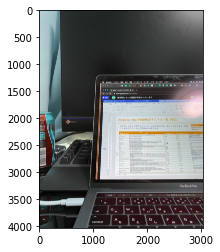

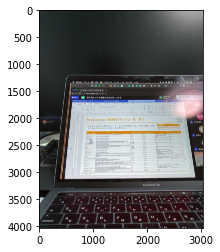

In [3]:
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

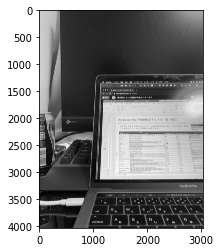

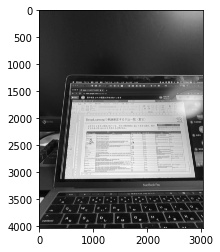

(4032, 3024) (4032, 3024)


In [4]:
img1_grey = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1_grey)
plt.gray()
plt.show()
img2_grey = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2_grey)
plt.gray()
plt.show()
print(img1_grey.shape, img2_grey.shape)

In [10]:
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img1_grey)

# compute the descriptors with ORB
kp, des = orb.compute(img1_grey, kp)

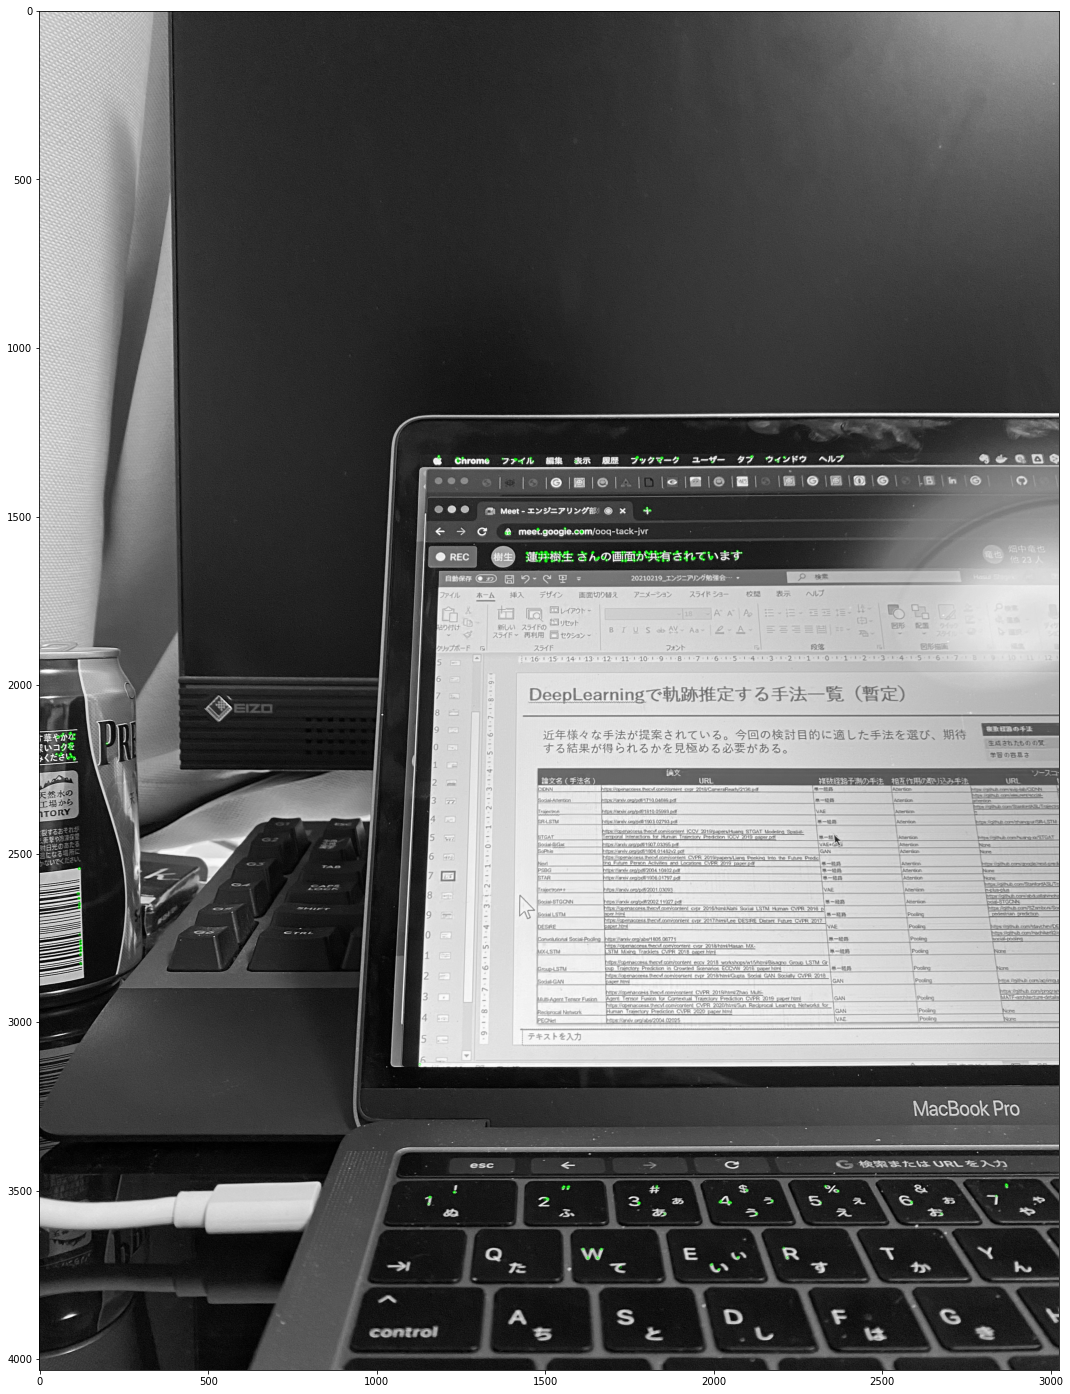

(<matplotlib.image.AxesImage at 0x128429f90>, None)

In [17]:
img1_keypoints = cv2.drawKeypoints(img1_grey,kp, None, color=(0,255,0))
plt.imshow(img1_keypoints),plt.show()

In [22]:
kp1, des1 = orb.detectAndCompute(img1_grey,None)
kp2, des2 = orb.detectAndCompute(img2_grey,None)

In [27]:
des1.shape, des2.shape

((500, 32), (500, 32))

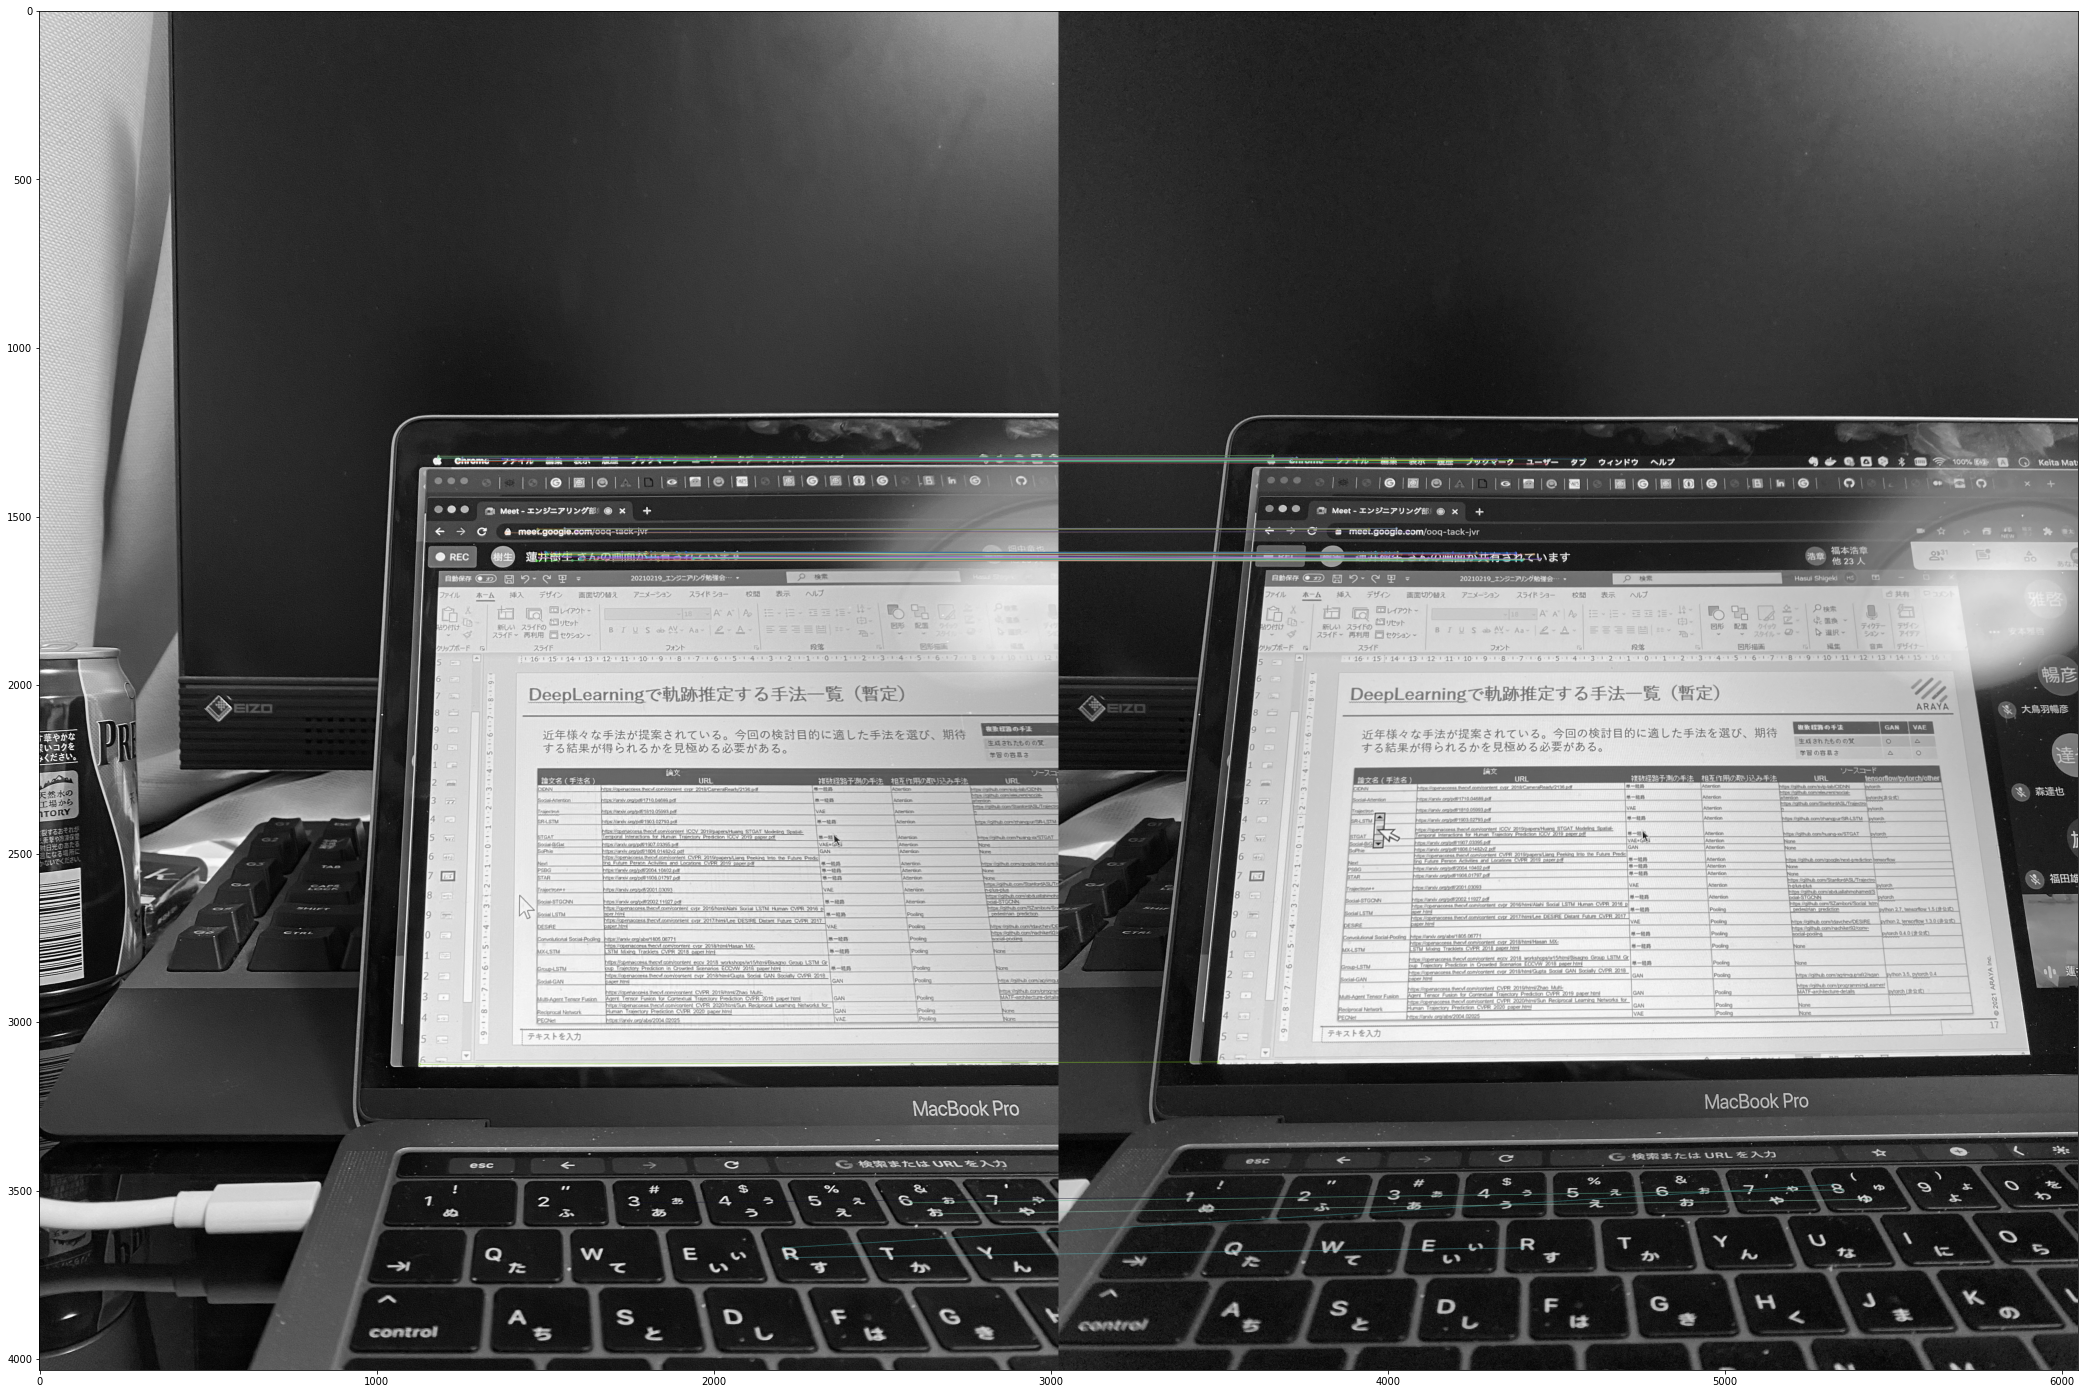

(<matplotlib.image.AxesImage at 0x10d7acb90>, None)

In [26]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1_grey,kp1,img2_grey,kp2, matches[:100], None, flags=2)

plt.imshow(img3),plt.show()